# Kaggle

In [1]:
import os
import numpy as np
import cv2
import time

import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import matplotlib.pyplot as plt

(572, 458, 3)
[landmark {
  x: 0.27651158
  y: 0.602497637
  z: 3.30310229e-007
}
landmark {
  x: 0.318882942
  y: 0.570026159
  z: -0.0139170103
}
landmark {
  x: 0.334728718
  y: 0.524510682
  z: -0.0203002244
}
landmark {
  x: 0.312726885
  y: 0.501998
  z: -0.0271935929
}
landmark {
  x: 0.284624308
  y: 0.517503262
  z: -0.0359046049
}
landmark {
  x: 0.285278678
  y: 0.469396055
  z: -0.0126774022
}
landmark {
  x: 0.273409963
  y: 0.420877188
  z: -0.0252939109
}
landmark {
  x: 0.263954163
  y: 0.391012847
  z: -0.038295988
}
landmark {
  x: 0.252976447
  y: 0.365116775
  z: -0.049018681
}
landmark {
  x: 0.254865259
  y: 0.4760454
  z: -0.0198740959
}
landmark {
  x: 0.244291037
  y: 0.422438741
  z: -0.0296876263
}
landmark {
  x: 0.234707236
  y: 0.387664586
  z: -0.0420821272
}
landmark {
  x: 0.222619921
  y: 0.358475149
  z: -0.0521360338
}
landmark {
  x: 0.229827225
  y: 0.491630465
  z: -0.02883224
}
landmark {
  x: 0.217183411
  y: 0.441137254
  z: -0.0382798202
}
lan

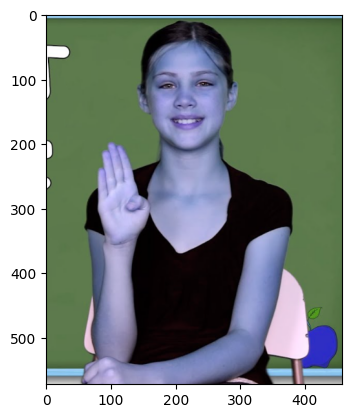

In [28]:
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5)

image = cv2.imread('chica_asl.png')
plt.imshow(image)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert the image to RGB.
print(image.shape)

results = hands.process(image_rgb)
print(results.multi_hand_landmarks)

if results.multi_hand_landmarks:

    h, w, c = image.shape 
    hand_landmarks = results.multi_hand_landmarks[0] 
    x_coords = [lm.x * w for lm in hand_landmarks.landmark]
    y_coords = [lm.y * h for lm in hand_landmarks.landmark]
    print(x_coords)
    print(y_coords)
    
    x_min = int(min(x_coords))
    x_max = int(max(x_coords))
    y_min = int(min(y_coords))
    y_max = int(max(y_coords))
    
    print(x_min, x_max, y_min, y_max)

    margin = 10
    hand_image = image[y_min-margin:y_max+margin, x_min-margin:x_max+margin ]

    #cv2.imshow('Hand Crop', hand_image)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    #cv2.imshow('Hand Crop', hand_image)
else:
    print("No hand detected.")

# Clean up.
hands.close()


(159, 88, 3)

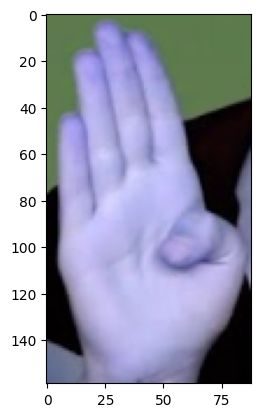

In [3]:
plt.imshow(hand_image)
hand_image.shape

array([[105, 105, 105, ..., 105, 105, 105],
       [105, 105, 105, ..., 105, 105, 105],
       [105, 105, 105, ..., 105, 105, 105],
       ...,
       [112, 113, 115, ...,   0,   0,   1],
       [111, 113, 113, ...,   0,   0,   1],
       [111, 112, 113, ...,   0,   0,   1]], dtype=uint8)

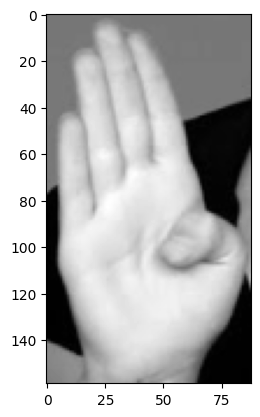

In [16]:
gray_hand = cv2.cvtColor(hand_image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_hand, cmap='gray')
gray_hand

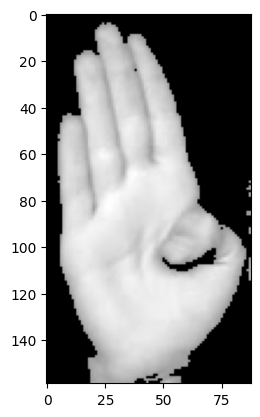

In [27]:
_,mask = cv2.threshold(gray_hand, 135, 255, cv2.THRESH_BINARY_INV)
background_mask = cv2.bitwise_not(mask)
black_background = np.zeros_like(gray_hand)

foreground = cv2.bitwise_and(gray_hand, gray_hand, mask=background_mask)
background = cv2.bitwise_and(black_background, black_background, mask=mask)
result = cv2.add(foreground, background)
plt.imshow(result, cmap='gray')

(400, 400)

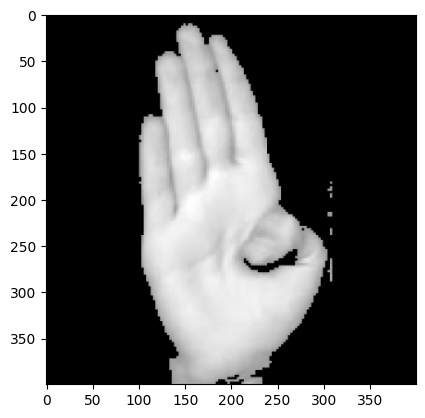

In [30]:
# Get the dimensions of the result image
height, width = result.shape

# Determine the size of the square
square_size = max(height, width)

# Create a new square image filled with black
square_image = np.zeros((square_size, square_size), dtype=np.uint8)

# Calculate the position to center the result image in the square image
y_offset = (square_size - height) // 2
x_offset = (square_size - width) // 2

# Place the result image in the center of the square image
square_image[y_offset:y_offset + height, x_offset:x_offset + width] = result

# Resize the square image to 400x400
resized_image = cv2.resize(square_image, (400, 400), interpolation=cv2.INTER_AREA)

# Display the resized image
plt.imshow(resized_image, cmap='gray')
resized_image.shape